In [39]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

%matplotlib inline
from matplotlib import style
# https://matplotlib.org/3.1.1/gallery/style_sheets/fivethirtyeight.html
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")


In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [24]:
# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [25]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_temp = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "06").all()
print(june_temp)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [27]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(june_temp)[0]
print(june_temp_list)

(78.0,)


In [30]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_temp_df=pd.DataFrame(june_temp, columns=['tobs'])
print(june_temp_df)

      tobs
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [32]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


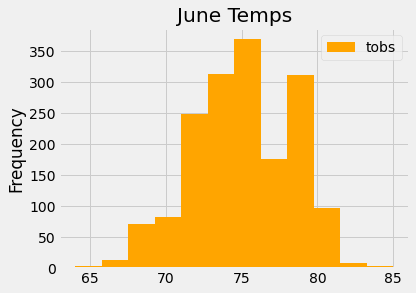

In [44]:
june_temp_df.plot.hist(bins=12, facecolor="orange")
plt.tight_layout()
plt.title("June Temps")
plt.savefig("June Temps")

## D2: Determine the Summary Statistics for December

In [33]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.tobs).\
                filter(func.strftime("%m", Measurement.date) == "12").all()
print(dec_temp)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [36]:
# 7. Convert the December temperatures to a list.
dec_temp_list = list(dec_temp)[0]
print(dec_temp_list)

(76.0,)


In [37]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df=pd.DataFrame(dec_temp, columns=['tobs'])
print(dec_temp_df)


      tobs
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


NameError: name 'df' is not defined

In [35]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
 dec_temp_df.describe()


,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [53]:
describe= june_temp_df.describe(), dec_temp_df.describe()
describe

(              tobs
 count  1700.000000
 mean     74.944118
 std       3.257417
 min      64.000000
 25%      73.000000
 50%      75.000000
 75%      77.000000
 max      85.000000,
               tobs
 count  1517.000000
 mean     71.041529
 std       3.745920
 min      56.000000
 25%      69.000000
 50%      71.000000
 75%      74.000000
 max      83.000000)

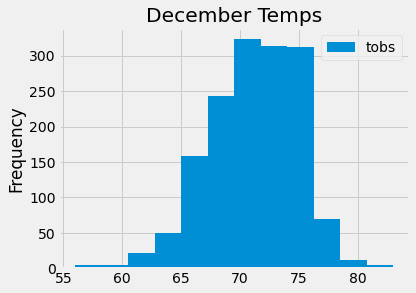

In [43]:
dec_temp_df.plot.hist(bins=12)
plt.tight_layout()
plt.title("December Temps")
plt.savefig("December Temps")

In [56]:
june_temp_df.describe().to_csv("june_describe.csv")
dec_temp_df.describe().to_csv("dec_describe.csv")
# https://stackoverflow.com/questions/48158688/save-pandas-describe-for-human-readibility

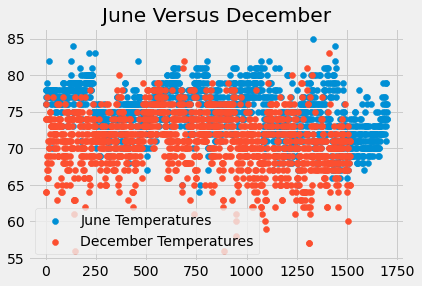

In [46]:
# Scatter Plot of Data
#plt.subplot(1, 1, 1)
plt.scatter(range(len(june_temp_df)), june_temp_df, label="June Temperatures")
plt.scatter(range(len(dec_temp_df)), dec_temp_df, label="December Temperatures")
plt.legend()
plt.title("June Versus December")
plt.savefig("June_December Scatter Plot.png")
# https://github.com/j1-aggie/SURFS-UP-sqlalchemy-challenge/blob/main/climate_starter.ipynb

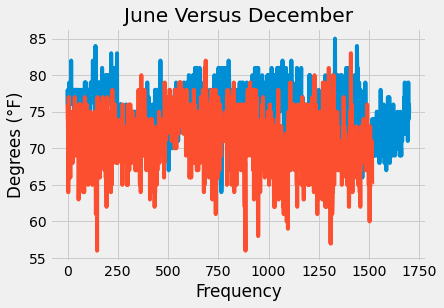

In [48]:
# Plot both of these lines so that they will appear on our final chart.
plt.plot(june_temp_df)
plt.plot(dec_temp_df)

# Create labels for the X and Y axis
plt.xlabel("Frequency")
plt.ylabel("Degrees (°F)")
plt.title("June Versus December")
# Save and display the chart
plt.savefig("June_Dec_avg_temp.png")
plt.show()